In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Manisha@21',
    database='ecommerce'
)
cursor = db.cursor()

# List all unique cities where customers are located.¶

In [2]:
query = """  select distinct customer_city from customers """

cursor.execute(query)

data = cursor.fetchall()


data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [3]:
query = """  select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cursor.execute(query)

data = cursor.fetchall()


"Total orders placed in 2017",data[0][0]

('Total orders placed in 2017', 45101)

# Find the total sales per category.

In [4]:
query = """ select products.product_category category, 
round(sum(payments.payment_value),2)sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category

"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns =['categories','sales'])
df

,categories,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


 # Calculate the percentage of orders that were paid in installments.

In [5]:
query = """  select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
"""

cursor.execute(query)

data = cursor.fetchall()


data

[(Decimal('99.9981'),)]

 # Count the number of customers from each state.

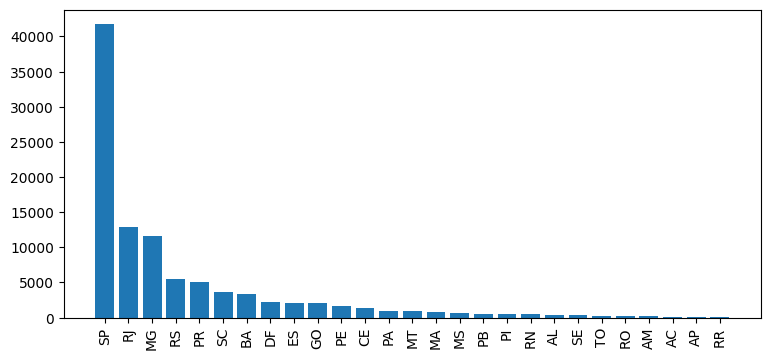

In [6]:
query = """ select customer_state ,count(customer_id) 
from customers
group by customer_state
"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ['states', 'customer_count'])
df = df.sort_values(by ='customer_count', ascending = False)

plt.figure(figsize =(9,4))
plt.bar(df['states'], df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

# Calculate the number of orders per month in 2018.

In [7]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Months", "Orders"])
df

,Months,Orders
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


# Find the average number of products per order, grouped by customer city.

In [8]:
query = """  with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc), 2) avarage_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by avarage_orders desc
"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["customer_city", "avarage_orders"])
df.head(10)


,customer_city,avarage_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [9]:
query = """ select products.product_category category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments)) * 100, 2 )sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales desc;

"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["categories", "sales%"])
df.head(5)

,categories,sales%
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93


# Identify the correlation between product price and the number of times a product has been purchased.

In [10]:
query = """ select products.product_category, count(order_items.product_id) count_products,
round(avg(order_items.price),2) avg_price 
from products join order_items on products.product_id = order_items.product_id
group by products.product_category order by avg_price desc

"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["category","order_count", "price"])

arr1= df["order_count"]
arr2 = df["price"]
a=np.corrcoef([arr1,arr2])
print("correlation between product price and the number of times a product has been purchased", a[0][1])

correlation between product price and the number of times a product has been purchased -0.10631514167157557


# Calculate the total revenue generated by each seller, and rank them by revenue.

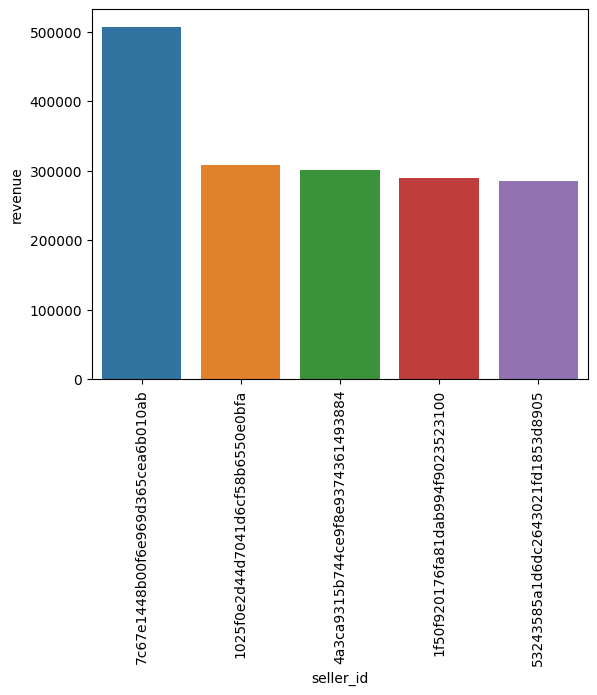

In [11]:
query = """ select * , dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments on
order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["seller_id","revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y= "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [12]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["cust_id","purchased_time", "payment", "mov_avg"])
df.head()

,cust_id,purchased_time,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


# Calculate the cumulative sales per month for each year.

In [13]:
query = """ select years, months, sum(payment)
over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years, 
monthname(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value), 2) as payment from orders join payments on
orders.order_id = payments.order_id
group by years, months
order by years, months) as a; 
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["years","months", "cumulative_sales"])
df

,years,months,cumulative_sales
0,2016,December,19.62
1,2016,October,59110.10
2,2016,September,59362.34
3,2017,April,477150.37
4,2017,August,1151546.69
5,2017,December,2029948.17
6,2017,February,2321856.18
7,2017,January,2460344.22
8,2017,July,3052727.14
9,2017,June,3564003.52


# Calculate the year-over-year growth rate of total sales.

In [14]:
query = """ with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value), 2) as payment from orders join payments on
orders.order_id = payments.order_id
group by years
order by years)
select years, ((payment - lag(payment, 1) over(order by years)) / 
lag(payment, 1) over(order by years)) * 100 from a
"""

cursor.execute(query)
data = cursor.fetchall()
df= pd.DataFrame(data, columns=["years","yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'a9dc96b027d1252bbac0a9b72d837fc6'),
  Text(1, 0, '1d34ed25963d5aae4cf3d7f3a4cda173'),
  Text(2, 0, '4a06381959b6670756de02e07b83815f'),
  Text(3, 0, '1617b1357756262bfa56ab541c47bc16'),
  Text(4, 0, 'c6e2731c5b391845f6800c97401a43a9'),
  Text(5, 0, '3fd6777bbce08a352fddd04e4a7cc8f6'),
  Text(6, 0, 'ec5b2ba62e574342386871631fafd3fc'),
  Text(7, 0, 'f48d464a0baaea338cb25f816991ab1f'),
  Text(8, 0, 'e0a2412720e9ea4f26c1ac985f6a7358')])

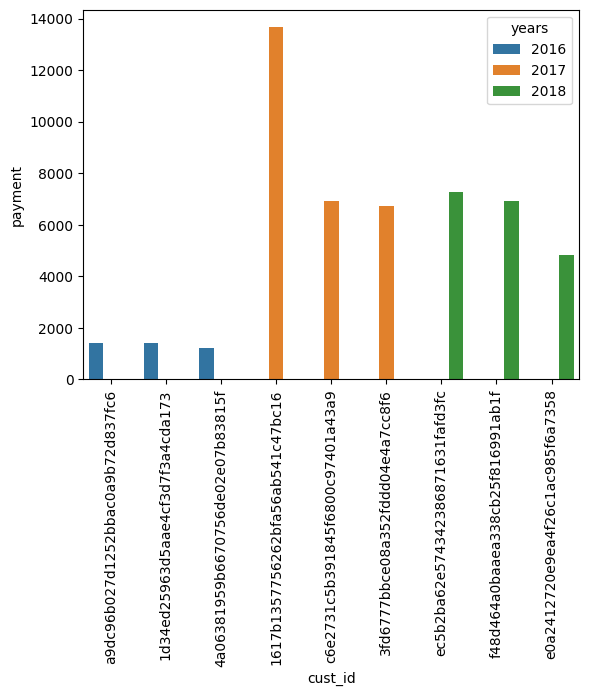

In [15]:
query = """ select years, customer_id , payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3 ;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["years", "cust_id","payment","rank"])
sns.barplot(x = "cust_id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
                                